# Support Vector Machines Project 
Iris dataset

## Importing Important Libraries

In [37]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Loading the dataset

In [38]:
iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


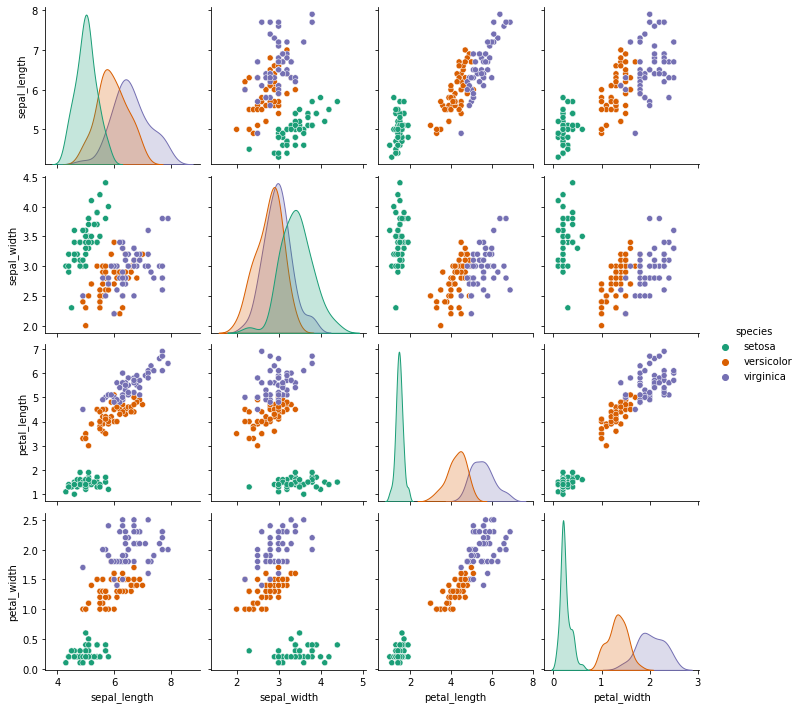

In [41]:
sns.pairplot(iris, hue = 'species', palette='Dark2')

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

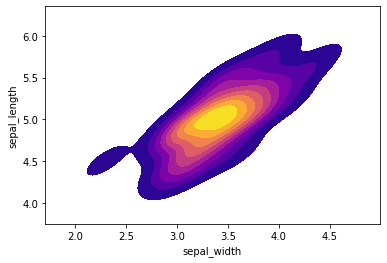

In [42]:
setosa = iris[iris['species'] == 'setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap = 'plasma', shade =True)

# Training a Model

Using a Support Vector Machine Classifier.

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
from sklearn.svm import SVC

In [47]:
model = SVC()

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [48]:
model.fit(X_train, y_train)

SVC()

In [49]:
predict = model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      1.00      0.94        16
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [52]:
print(confusion_matrix(y_test, predict))

[[14  0  0]
 [ 0 16  0]
 [ 0  2 13]]


## Gridsearch 

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'C':[0,1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [57]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [58]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END ....................................C=0, gamma=0.01; total time=   0.0s
[CV] END ....................................C=

/home/tetrex/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tetrex/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tetrex/.local/lib/python3.9/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/tetrex/.local/lib/python3.9/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/tetrex/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: F

[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ...................

/home/tetrex/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.96190476 0.96190476
 0.94285714 0.6952381  0.96190476 0.96190476 0.94285714 0.6952381
 0.96190476 0.96190476 0.96190476 0.93333333 0.93333333 0.94285714
 0.96190476 0.96190476]
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [59]:
pred = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test, pred))

[[14  0  0]
 [ 0 15  1]
 [ 0  2 13]]


In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.94      0.91        16
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45

